In [290]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time

In [291]:
def read_data(filename):
    file1 = open(filename, "r")
    m = int(file1.readline())
    n = int(file1.readline())
    aRead = []
    for i in range(n):
        aRead.append(list(map(int, file1.readline().split())))
    k = int(file1.readline())
    bRead = []
    for i in range(k):
        bRead.append(list(map(int, file1.readline().split())))
    a = np.array(aRead)
    b = np.array(bRead)
    X_train = a[:, :-1]
    Y_train = a[:, -1]
    X_test = b[:, :-1]
    Y_test = b[:, -1]
    return X_train, Y_train, X_test, Y_test


In [292]:
Xtrain, Ytrain, Xtest, Ytest = read_data("LR/2.txt")
print(len(Xtrain))
print(len(Ytrain))

1283
1283


In [293]:
def NRMSE(X, y, W):
    #print(X.shape, y.shape, W.shape)
    return math.sqrt((np.square(X.dot(W) - y)).mean()) / (np.max(y) - np.min(y))

In [294]:
def invMethod(X_train, y_train, X_test, y_test):
    w = np.linalg.pinv(X_train).dot(y_train)
    return NRMSE(X_train, y_train, w), NRMSE(X_test, y_test, w)

print(invMethod(Xtrain, Ytrain, Xtest, Ytest))

(1.6793517608150572e-05, 4.462860159147035e-06)


(0.005610533875797866, 0.006904012605237282)


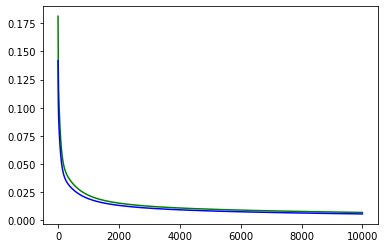

In [333]:
def gradient(X_train, y_train, X_test, y_test, Wstart, iterations = 1000, k = 1, tau = 1e10, f = 0, f2 = 1, is_print = 0):
    m = X_train.shape[1]
    W = np.copy(Wstart)
    iters = []
    train_results = []
    test_results = []
    mytime = time.time()
    times = []
    best_ans = 10000
    best_iter = -1
    for i in range(iterations):
        if f:
            alpha = k
        else:
            alpha = k / (i + 1)
        diff = X_train.dot(W) - y_train
        nextValue = ((X_train.T.dot(diff)) * 2) / m
        W = W * (1 - tau * alpha) - alpha * nextValue
        iters.append(i)
        train_results.append(NRMSE(X_train, y_train, W))
        test_results.append(NRMSE(X_test, y_test, W))
        times.append(time.time() - mytime)
    if is_print:
        plt.plot(iters, test_results, color = 'green')
        plt.plot(iters, train_results, color = 'blue')
    if f2:
        return NRMSE(X_train, y_train, W), NRMSE(X_test, y_test, W)
    return iters, train_results, test_results, times
print(gradient(Xtrain, Ytrain, Xtest, Ytest, np.zeros(Xtrain.shape[1]), iterations = 10000, tau = 10 ** 10, k = 10 ** (-17), f=1, is_print = 1))

(0.026396430946464634, 0.031119435310722008)

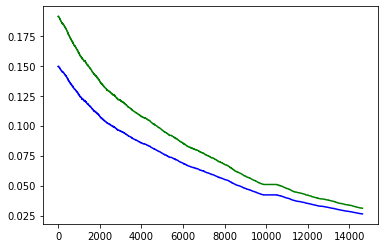

In [356]:
def genetic(X_train, y_train, X_test, y_test, k=10**(-3), iterations = 10000, f2=1):
    m = X_test.shape[1]
    W = np.zeros(m)
    iters = []
    train_results = []
    test_results = []
    times = []
    mytime = time.time()
    ans = NRMSE(X_train, y_train, W)
    cnt = 0
    for i in range(iterations):
        curW = W
        devW = np.array([random.uniform(-k, k) for i in range(m)])
        newW = curW + devW
        score = NRMSE(X_train, y_train, newW)
        while score < ans:
            cnt += 1
            ans = score
            W = newW
            newW += devW
        iters.append(i + cnt)
        train_results.append(NRMSE(X_train, y_train, W))
        test_results.append(NRMSE(X_test, y_test, W))
        times.append(time.time() - mytime)
    if (f2):
        plt.plot(iters, test_results, color = 'green')
        plt.plot(iters, train_results, color = 'blue')
        return NRMSE(X_train, y_train, W), NRMSE(X_test, y_test, W)
    return iters, train_results, test_results, times
genetic(Xtrain, Ytrain, Xtest, Ytest)

In [337]:
def doAll(X_train, y_train, X_test, y_test):
    W = list()
    m = X_train.shape[1]
    W.append(np.zeros(m))
    W.append(np.random.normal(-2/m, 2/m, m))
    alphas = []
    taus = []
    for k in range(14, 21):
        alphas.append(10 ** (-k))
        alphas.append(10 ** (-k) / 2)
    taus.append(0)
    for i in range(-10, 17, 2):
        taus.append(10 ** i)
    best_score = 10000
    ans_j = 0 
    ans_al = alphas[0]
    ans_w = W[0]
    ans_t = taus[0]
    for j in range(0, 2):
        for alpha in alphas:
            for startW in W:
                for t in taus:
                    res1, res2 = gradient(X_train, y_train, X_test, y_test, startW, k = alpha, tau = t, f = j, f2 = 1)
                    #print(res2)
                    if res2 < best_score:
                        best_score = res2
                        ans_j = j
                        ans_al = alpha
                        ans_w = startW
                        ans_t = t
    print(best_score)
    return ans_j, ans_al, ans_w, ans_t

In [ ]:
ans = doAll(Xtrain, Ytrain, Xtest, Ytest)
print(ans[0], ans[1], ans[3])
parameters = gradient(Xtrain, Ytrain, Xtest, Ytest, ans[2], iterations = 10000, k = ans[1], tau = 0, f = ans[0], f2 = 0, is_print = 0)

In [ ]:
def draw(X_train, y_train, X_test, y_test, params, f):
    gen_params = genetic(X_train, y_train, X_test, y_test, f2 = 0)
    ans1, ans2 = invMethod(X_train, y_train, X_test, y_test)
    arr1 = [ans1 for i in range(len(params[0]))]
    arr2 = [ans2 for i in range(len(params[0]))]
    if (f):
        plt.xlabel('iterations')
        plt.ylabel('NRMSE')
        plt.plot(params[0], params[2], color='green', label='gradient_test')
        plt.plot(gen_params[0], gen_params[2], color='blue', label='generic_test')
        plt.plot(params[0], arr2, color='black', label='inv_test')
        plt.plot(params[0], params[1], color='orange', label='gradient_train')
        plt.plot(gen_params[0], gen_params[1], color='purple', label='generic_train')
        plt.plot(params[0], arr1, color='black', label='inv_train')
        plt.legend()
    else:
        plt.xlabel('time')
        plt.ylabel('NRMSE')
        plt.plot(params[3], params[2], color='green', label='gradient_test')
        plt.plot(gen_params[3], gen_params[2], color='blue', label='generic_test')
        plt.plot(params[3], arr2, color='red', label='inv_test')
        plt.plot(params[3], params[1], color='orange', label='gradient_train')
        plt.plot(gen_params[3], gen_params[1], color='purple', label='generic_train')
        plt.plot(params[3], arr1, color='black', label='inv_train')
        plt.legend()

In [ ]:
draw(Xtrain, Ytrain, Xtest, Ytest, parameters, 1)

In [ ]:
draw(Xtrain, Ytrain, Xtest, Ytest, parameters, 0)

0.006886093196231638
1 1e-16 100000


In [357]:
def draw(X_train, y_train, X_test, y_test, params, f):
    gen_params = genetic(X_train, y_train, X_test, y_test, f2 = 0)
    ans1, ans2 = invMethod(X_train, y_train, X_test, y_test)
    arr1 = [ans1 for i in range(len(params[0]))]
    arr2 = [ans2 for i in range(len(params[0]))]
    if (f):
        plt.xlabel('iterations')
        plt.ylabel('NRMSE')
        plt.plot(params[0], params[2], color='green', label='gradient_test')
        plt.plot(gen_params[0], gen_params[2], color='blue', label='generic_test')
        plt.plot(params[0], arr2, color='black', label='inv_test')
        plt.plot(params[0], params[1], color='orange', label='gradient_train')
        plt.plot(gen_params[0], gen_params[1], color='purple', label='generic_train')
        plt.plot(params[0], arr1, color='black', label='inv_train')
        plt.legend()
    else:
        plt.xlabel('time')
        plt.ylabel('NRMSE')
        plt.plot(params[3], params[2], color='green', label='gradient_test')
        plt.plot(gen_params[3], gen_params[2], color='blue', label='generic_test')
        plt.plot(params[3], arr2, color='red', label='inv_test')
        plt.plot(params[3], params[1], color='orange', label='gradient_train')
        plt.plot(gen_params[3], gen_params[1], color='purple', label='generic_train')
        plt.plot(params[3], arr1, color='black', label='inv_train')
        plt.legend()

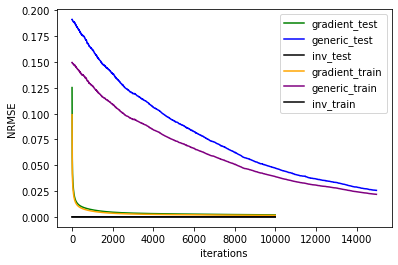

In [358]:
draw(Xtrain, Ytrain, Xtest, Ytest, parameters, 1)

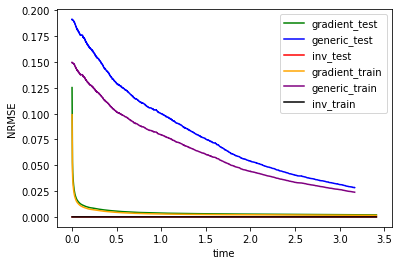

In [359]:
draw(Xtrain, Ytrain, Xtest, Ytest, parameters, 0)